In [1]:
pip install split-folders tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os

Input Folder untuk dibagi menjadi train dan val

In [4]:
base_dir = '/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto'

# Preprocessing

In [5]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1399 files [00:51, 27.17 files/s]


Menambahkan masing masing folder untuk train dan validation

In [6]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

In [8]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 977 images belonging to 7 classes.
Found 138 images belonging to 7 classes.
Found 284 images belonging to 7 classes.


# Visualisasi

In [10]:
class_name = ['A','B','C','D','E','F','G']

In [11]:
image, label = train_generator.next()

In [12]:
len(image)

32

In [13]:
label

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

In [14]:
print(image.shape)

(32, 150, 150, 3)


In [15]:
# gambar = tf.reshape(image[3],(150,150))

In [16]:
#plt.imshow(gambar)

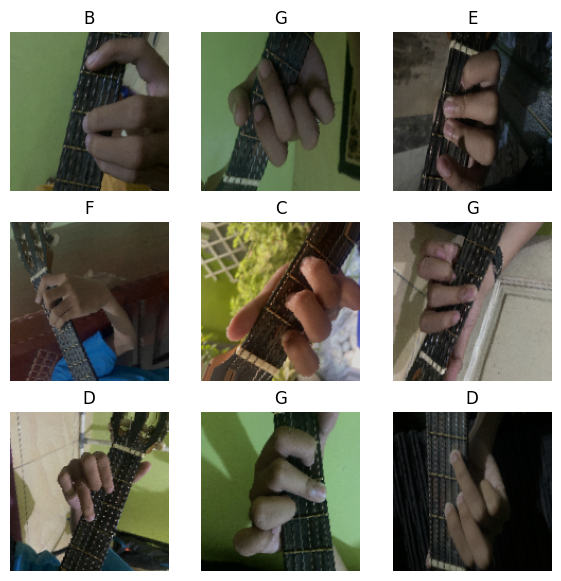

In [17]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")


(32, 150, 150, 3)


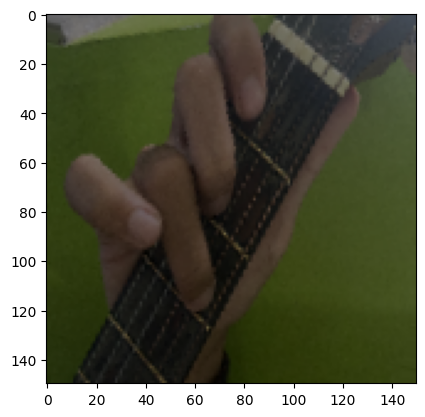

(32, 150, 150, 3)


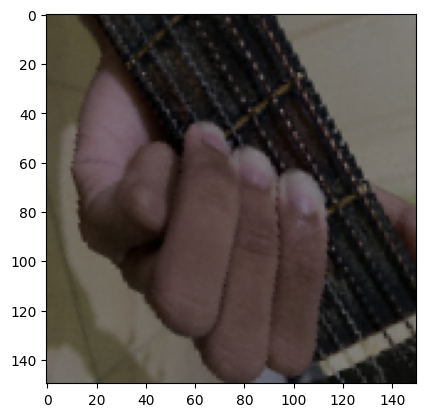

(32, 150, 150, 3)


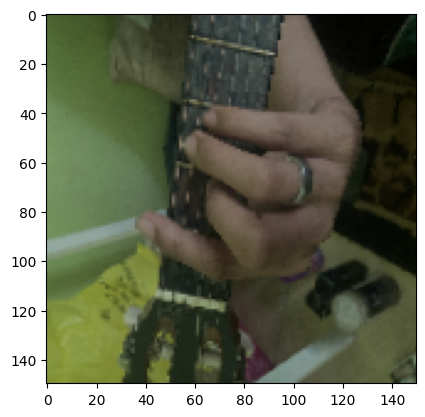

(32, 150, 150, 3)


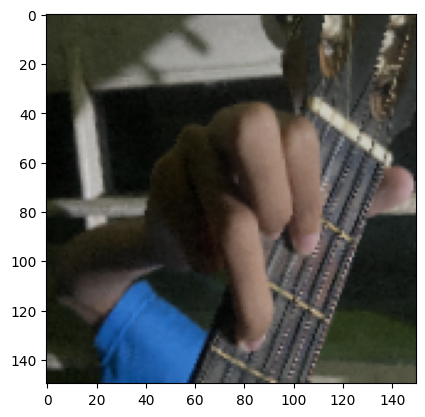

(32, 150, 150, 3)


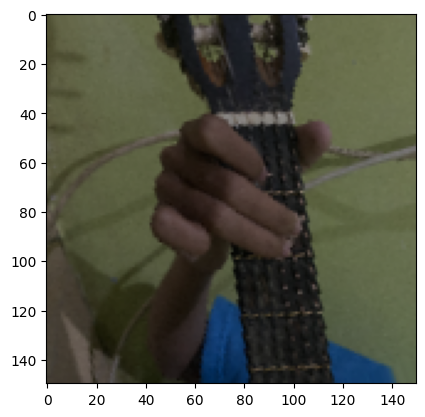

(32, 150, 150, 3)


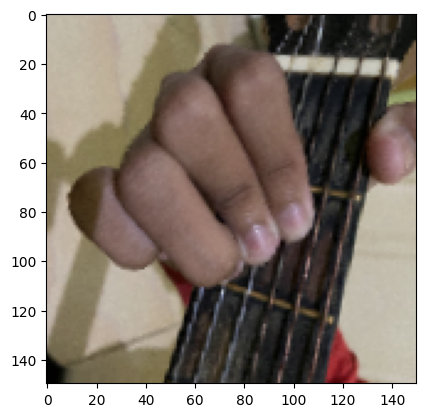

(32, 150, 150, 3)


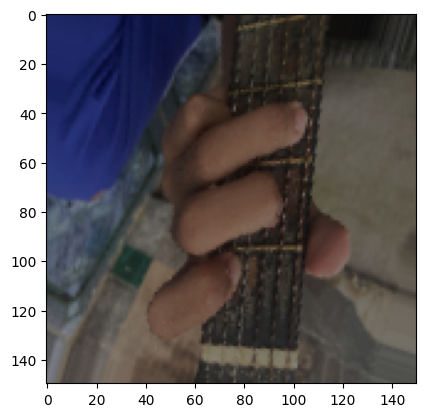

In [18]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print(img.shape)   #  (1,256,256,3)
  plt.imshow(img[i])
  plt.show()

# Modeling

In [19]:
from tensorflow import keras

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax') # output Layer
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [24]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator, # untuk akurasi pengujian data
)

Epoch 1/25
31/31 [==============================] - 245s 8s/step - loss: 1.9494 - accuracy: 0.1361 - val_loss: 1.9426 - val_accuracy: 0.1812
Epoch 2/25
31/31 [==============================] - 203s 7s/step - loss: 1.9398 - accuracy: 0.1781 - val_loss: 1.9378 - val_accuracy: 0.1449
Epoch 3/25
31/31 [==============================] - 221s 7s/step - loss: 1.8565 - accuracy: 0.2170 - val_loss: 1.9109 - val_accuracy: 0.2681
Epoch 4/25
31/31 [==============================] - 234s 8s/step - loss: 1.7078 - accuracy: 0.3265 - val_loss: 1.5887 - val_accuracy: 0.3696
Epoch 5/25
31/31 [==============================] - 221s 7s/step - loss: 1.5358 - accuracy: 0.4104 - val_loss: 2.3240 - val_accuracy: 0.3551
Epoch 6/25
31/31 [==============================] - 211s 7s/step - loss: 1.3653 - accuracy: 0.4852 - val_loss: 2.1694 - val_accuracy: 0.3841
Epoch 7/25
31/31 [==============================] - 208s 7s/step - loss: 1.2015 - accuracy: 0.5445 - val_loss: 1.7344 - val_accuracy: 0.5435
Epoch 8/25
31

In [55]:
model.save('/Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model')
model.save('/Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model.h5')

INFO:tensorflow:Assets written to: /Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model\assets


INFO:tensorflow:Assets written to: /Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model\assets


# Evaluate

In [26]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.35184386372566223
Test accuracy : 0.9


# Preview Hasil Prediksi

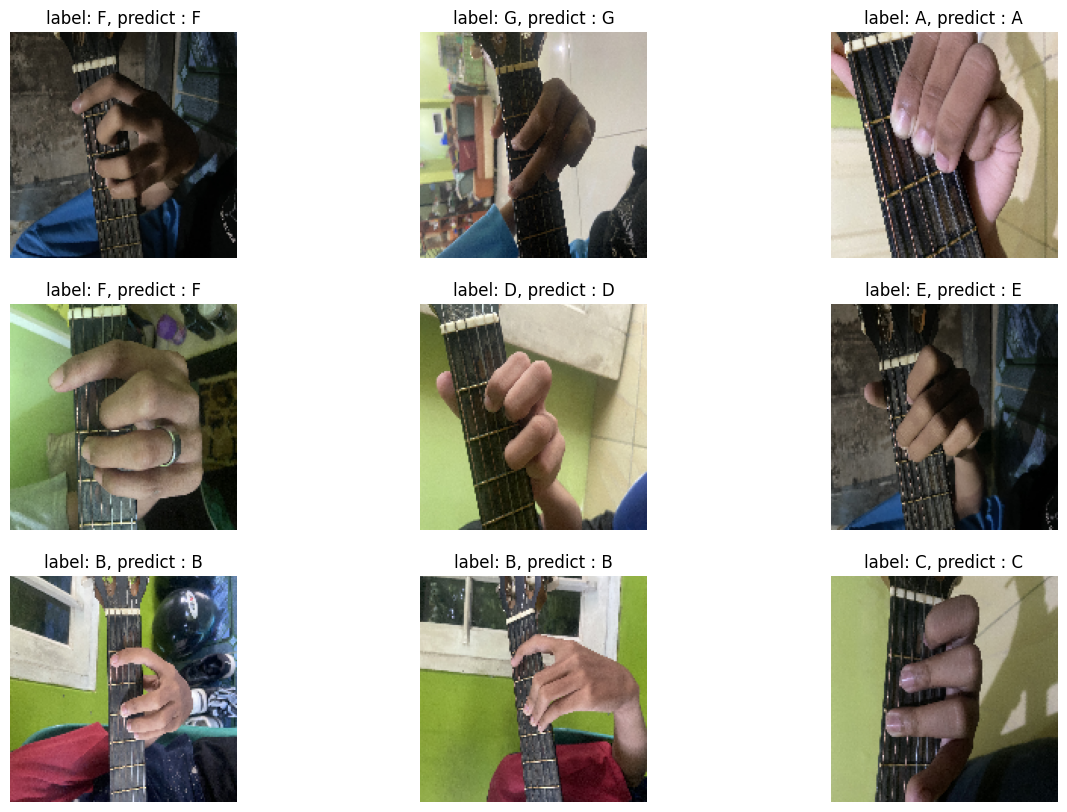

In [35]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

# Prediksi Error

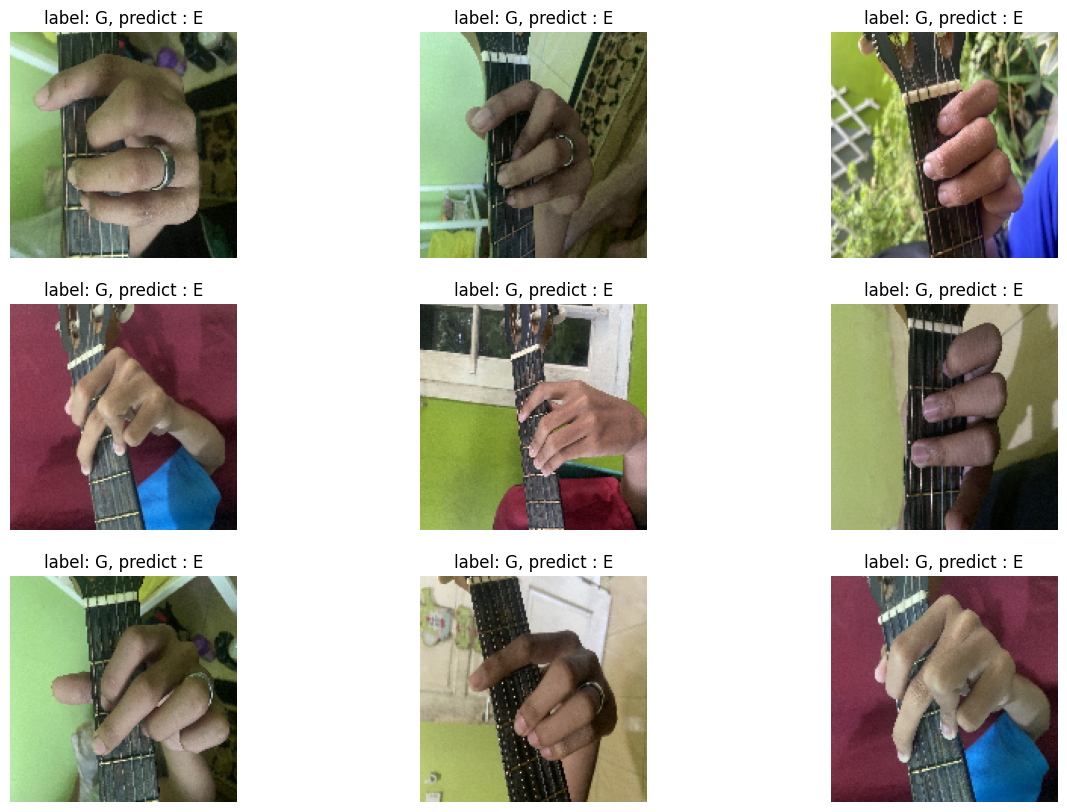

In [46]:
#Plot prediction Error
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))

i,j = 0,0
while (j < 9):
    plt.subplot(3,3,j+1)
    plt.axis('off')
    if (TrueLabel != class_name[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')
        j+=1
    i+=1

# Classification report dan Confusin Matrix

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [101]:
y_pred = model.predict(test_generator)

9/9 [==============================] - 49s 5s/step


In [102]:
y_pred

array([[1.8253807e-06, 6.3215630e-06, 4.3001615e-02, ..., 2.0444368e-03,
        3.0938420e-04, 9.5339543e-01],
       [4.7092630e-14, 1.5227546e-09, 1.2644558e-06, ..., 8.2327870e-06,
        8.4859568e-07, 7.2031511e-08],
       [1.8538390e-07, 2.5429696e-04, 7.2889555e-01, ..., 2.6103315e-01,
        2.2808036e-03, 5.7899309e-03],
       ...,
       [2.9671128e-13, 1.6584698e-10, 8.3046911e-07, ..., 1.1771471e-07,
        2.9477929e-09, 1.1834024e-10],
       [9.9617046e-01, 1.8735175e-08, 8.4850003e-09, ..., 8.9624677e-07,
        2.0470518e-08, 4.4950954e-09],
       [3.0705401e-06, 5.3919142e-05, 1.4768323e-03, ..., 8.0320293e-01,
        1.7502995e-05, 1.9463927e-01]], dtype=float32)

In [103]:
y_predict = np.argmax(y_pred, axis=1)

In [104]:
print(classification_report(test_generator.labels, y_predict, target_names = class_name))

              precision    recall  f1-score   support

           A       0.15      0.15      0.15        40
           B       0.07      0.05      0.06        40
           C       0.15      0.15      0.15        40
           D       0.14      0.14      0.14        42
           E       0.13      0.17      0.15        41
           F       0.19      0.19      0.19        42
           G       0.18      0.18      0.18        39

    accuracy                           0.15       284
   macro avg       0.14      0.15      0.15       284
weighted avg       0.15      0.15      0.15       284



# Confusion Matrix

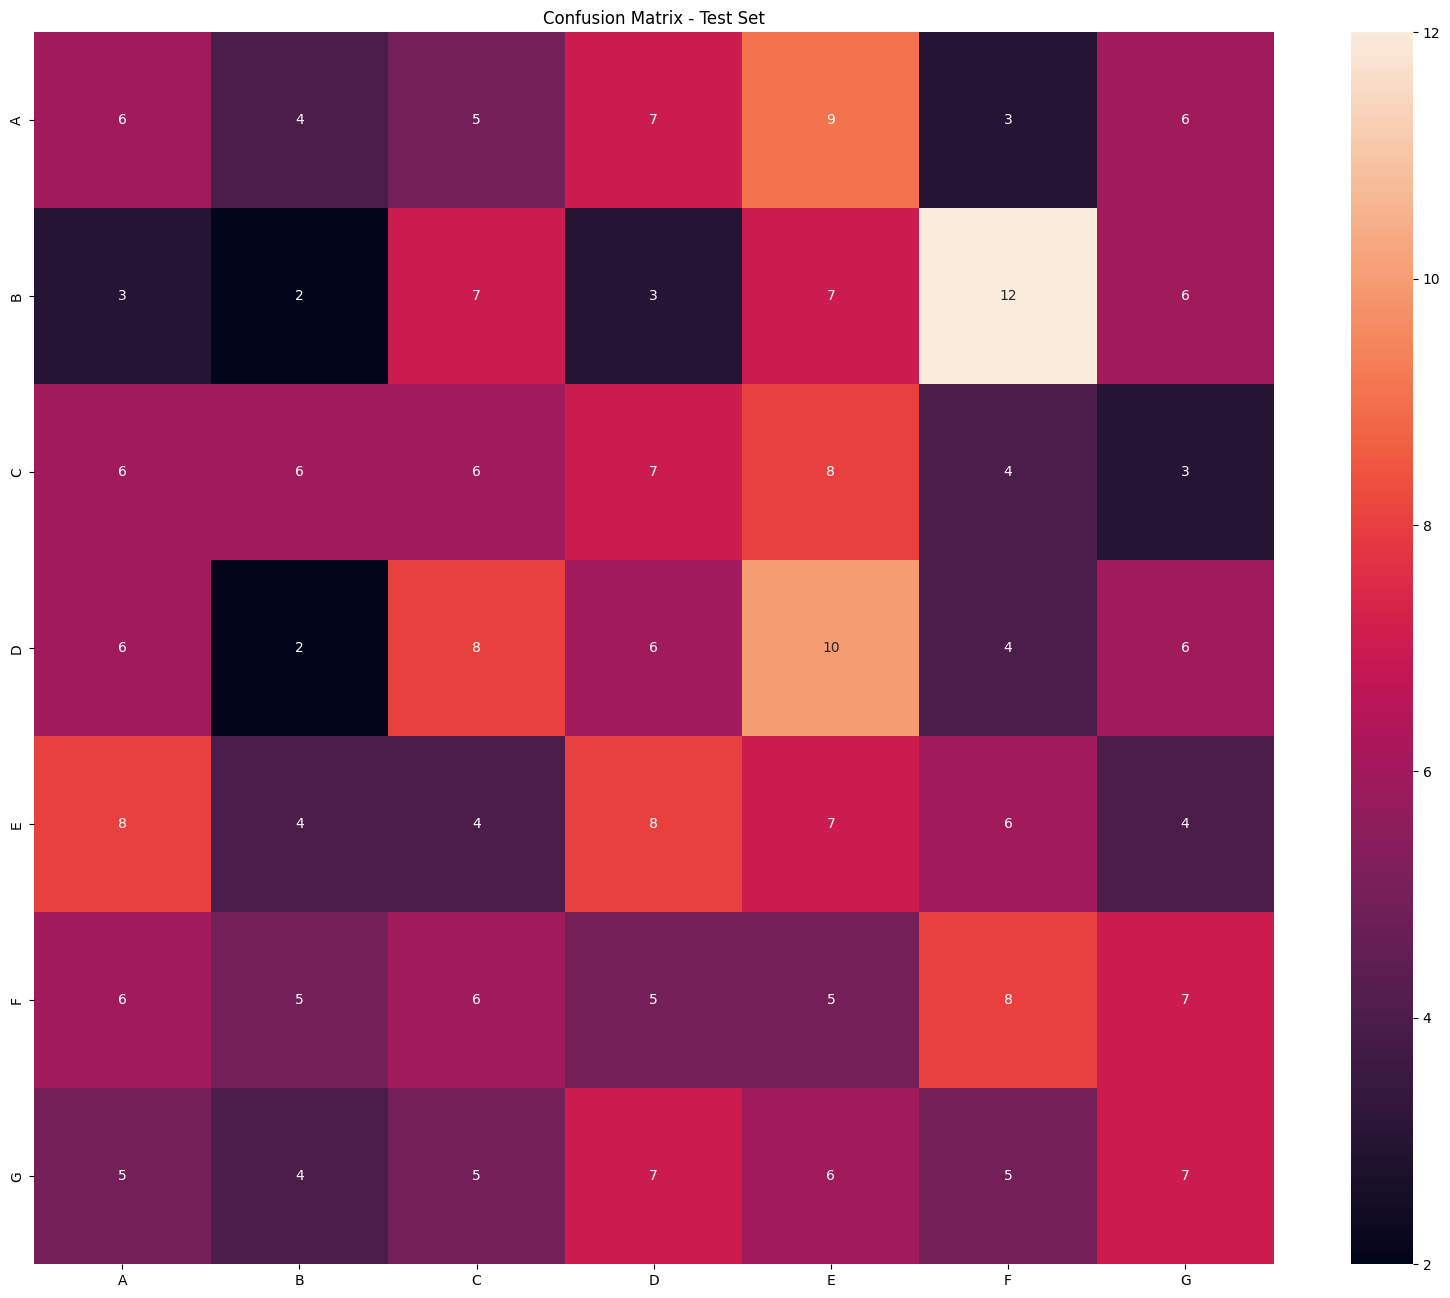

In [106]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_generator.labels, y_predict)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Mencoba Program dengan upload data gambar untuk di cek hasilnya

In [ ]:
#  upload = files.upload() buat pas make google colab

In [52]:
# from google.colab import files
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.utils import load_img
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

1/1 [==============================] - 0s 65ms/step
E:/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto/F/IMG_1137.jpeg
F


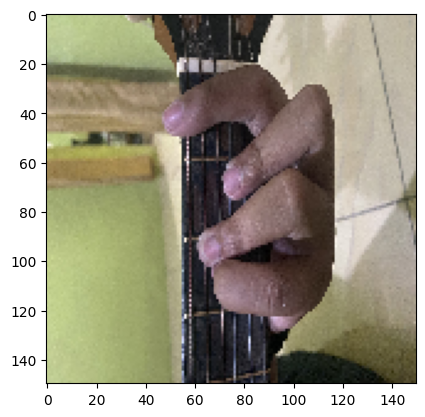

In [53]:
filename = askopenfilename()
img = keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('A')
elif classes[0][1] == 1:
  print('B')
elif classes[0][2] == 1:
  print('C')
elif classes[0][3] == 1:
  print('D')
elif classes[0][4] == 1:
  print('E')
elif classes[0][5] == 1:
  print('F')
else:
  print('G')